# Import Packages

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


# Load Data

In [22]:
def load_data():
    df = pd.read_csv(r"data/spam.csv", encoding='latin-1')    
    return df

In [23]:
df = load_data()

In [24]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [25]:
df.shape

(5572, 5)

# Data cleaning

In [26]:
# Drop those unwanted columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [27]:
# rename the columns
new_name = {'v1':'is_spam', 'v2':'sms'}
df.rename(columns=new_name, inplace=True)
df

,is_spam,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [28]:
df.head()

,is_spam,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df.tail()

,is_spam,sms
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   is_spam  5572 non-null   object
 1   sms      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [31]:
df.describe()

,is_spam,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [32]:
# Check for null values
df.isnull().sum()

is_spam    0
sms        0
dtype: int64

# EDA

In [33]:
# convert is_spam to numerical value
# say spam = 1
# non-spam = 0
df['is_spam'] = df['is_spam'].apply(lambda x: 1 if x=='spam' else 0)
df

,is_spam,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


is_spam
0    4825
1     747
Name: count, dtype: int64


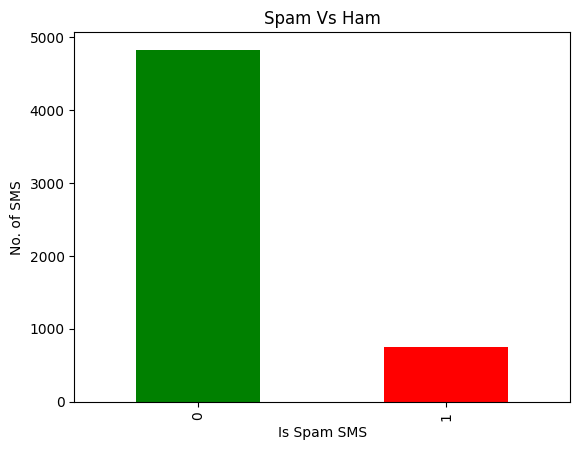

In [34]:
# spams and non-spam sms counts
spams = df['is_spam'].value_counts()
print(spams)
spams.plot(kind='bar', color=['green','red'])
plt.title("Spam Vs Ham")
plt.xlabel("Is Spam SMS")
plt.ylabel("No. of SMS")
plt.show()

([<matplotlib.patches.Wedge at 0x218bb148fb0>,
 [Text(-1.0038715425384215, 0.4497131597824666, 'ham'),
  Text(1.0038714746336121, -0.44971331136284726, 'spam')],
 [Text(-0.547566295930048, 0.24529808715407267, '86.59'),
  Text(0.5475662588910611, -0.24529816983428027, '13.41')])

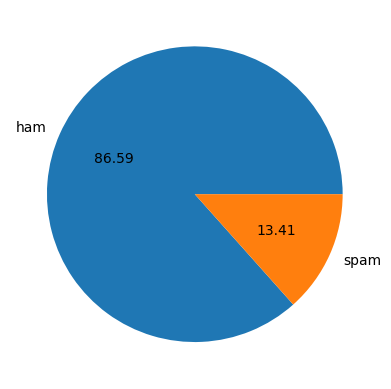

In [35]:
plt.pie(spams, labels=['ham','spam'], autopct='%0.2f')

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
# Let's see how many words does each sms has
nltk.download('punkt_tab') 
def get_words(sms_string):
    words = nltk.word_tokenize(sms_string)
    return len(words)

df['words_count'] = df['sms'].apply(get_words)
df

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


,is_spam,sms,words_count
0,0,"Go until jurong point, crazy.. Available only ...",24
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35
5568,0,Will Ì_ b going to esplanade fr home?,9
5569,0,"Pity, * was in mood for that. So...any other s...",15
5570,0,The guy did some bitching but I acted like i'd...,27


In [40]:
# Averge words per sms in spam and ham sms
# df['sms'].apply(get_words).
df.groupby('is_spam')['words_count'].mean()

is_spam
0    17.276269
1    27.891566
Name: words_count, dtype: float64

In [41]:
# Looks like the spam sms are comparatively lengthy than ham sms.

In [42]:
# Sentences in each sms
def get_sentences(sms_string):
    sens = nltk.sent_tokenize(sms_string)
    return len(sens)

df['sentence_count'] = df['sms'].apply(get_sentences)


In [43]:
# Average sentences per sms
df.groupby('is_spam')['sentence_count'].mean()

is_spam
0    1.837720
1    3.021419
Name: sentence_count, dtype: float64

In [44]:
df['numbers_count'] = df['sms'].apply(lambda x: len(re.findall(r'\b\d+\b', str(x))))
df

,is_spam,sms,words_count,sentence_count,numbers_count
0,0,"Go until jurong point, crazy.. Available only ...",24,2,0
1,0,Ok lar... Joking wif u oni...,8,2,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,3
3,0,U dun say so early hor... U c already then say...,13,1,0
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,0
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,4,4
5568,0,Will Ì_ b going to esplanade fr home?,9,1,0
5569,0,"Pity, * was in mood for that. So...any other s...",15,2,0
5570,0,The guy did some bitching but I acted like i'd...,27,1,0


In [45]:
df.groupby('is_spam')['numbers_count'].mean()

is_spam
0    0.191088
1    2.856760
Name: numbers_count, dtype: float64

In [46]:
df.head()

,is_spam,sms,words_count,sentence_count,numbers_count
0,0,"Go until jurong point, crazy.. Available only ...",24,2,0
1,0,Ok lar... Joking wif u oni...,8,2,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,3
3,0,U dun say so early hor... U c already then say...,13,1,0
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,0


In [47]:
# describe the entire data frame
df.describe()

,is_spam,words_count,sentence_count,numbers_count
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,18.699390,1.996411,0.548457
std,0.340751,13.741932,1.520159,1.313389
min,0.000000,1.000000,1.000000,0.000000
25%,0.000000,9.000000,1.000000,0.000000
50%,0.000000,15.000000,1.500000,0.000000
75%,0.000000,27.000000,2.000000,0.000000
max,1.000000,220.000000,38.000000,13.000000


#### Analyzing only the spam sms

In [48]:
df[df['is_spam']==0].describe()

,is_spam,words_count,sentence_count,numbers_count
count,4825.0,4825.000000,4825.000000,4825.000000
mean,0.0,17.276269,1.837720,0.191088
std,0.0,13.988585,1.454388,0.735813
min,0.0,1.000000,1.000000,0.000000
25%,0.0,8.000000,1.000000,0.000000
50%,0.0,13.000000,1.000000,0.000000
75%,0.0,22.000000,2.000000,0.000000
max,0.0,220.000000,38.000000,13.000000


#### Analyzing only the ham sms

In [49]:
df[df['is_spam']==1].describe()

,is_spam,words_count,sentence_count,numbers_count
count,747.0,747.000000,747.000000,747.000000
mean,1.0,27.891566,3.021419,2.856760
std,0.0,6.867007,1.537580,1.794269
min,1.0,2.000000,1.000000,0.000000
25%,1.0,25.000000,2.000000,2.000000
50%,1.0,29.000000,3.000000,3.000000
75%,1.0,32.000000,4.000000,4.000000
max,1.0,46.000000,9.000000,9.000000


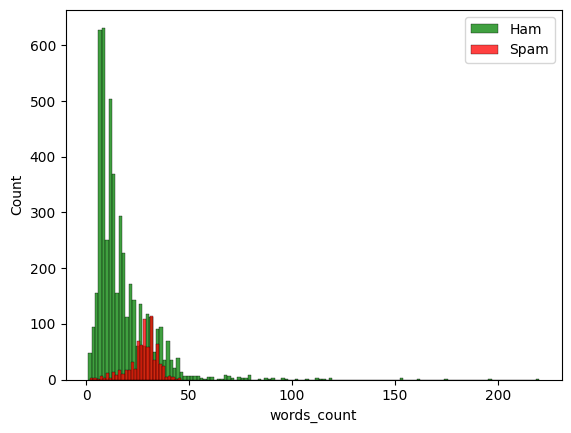

In [50]:
# sns.histplot(df[df['is_spam']==0]['sentence_count'])
sns.histplot(df[df['is_spam']==0]['words_count'],color='green' )
sns.histplot(df[df['is_spam']==1]['words_count'], color='red' )
plt.legend(['Ham','Spam'])

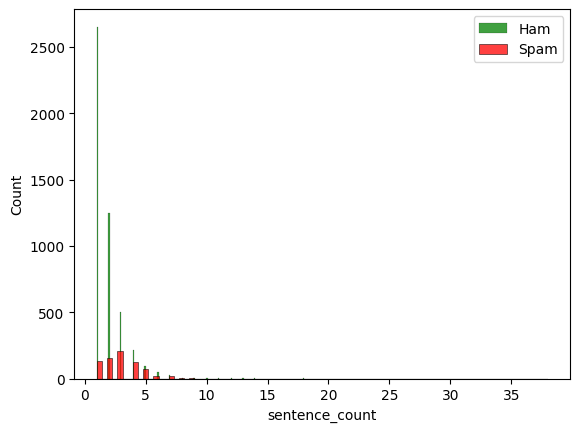

In [51]:
# sns.histplot(df[df['is_spam']==0]['sentence_count'])
sns.histplot(df[df['is_spam']==0]['sentence_count'], color='green' )
sns.histplot(df[df['is_spam']==1]['sentence_count'], color='red' )
plt.legend(['Ham','Spam'])

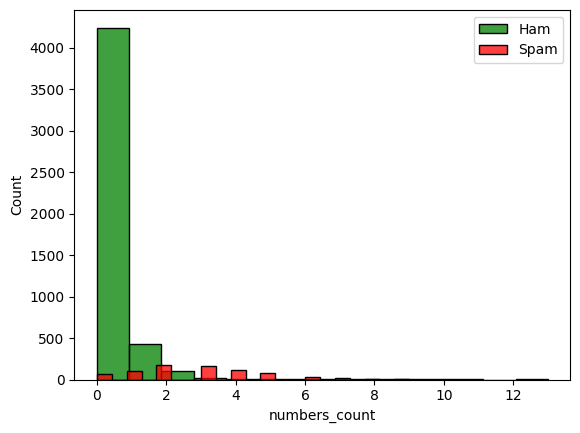

In [52]:
# sns.histplot(df[df['is_spam']==0]['sentence_count'])
sns.histplot(df[df['is_spam']==0]['numbers_count'], color='green' )
sns.histplot(df[df['is_spam']==1]['numbers_count'], color='red' )
plt.legend(['Ham','Spam'])

#### Relationship between two variables from DataFrame 

#### Find correlation between the sentence, words, and numbers count in each sms

In [53]:
corr_columns = ['words_count','sentence_count','numbers_count','is_spam']
df[corr_columns].corr()

,words_count,sentence_count,numbers_count,is_spam
words_count,1.000000,0.685165,0.344956,0.263221
sentence_count,0.685165,1.000000,0.333096,0.265332
numbers_count,0.344956,0.333096,1.000000,0.691593
is_spam,0.263221,0.265332,0.691593,1.000000


<Axes: >

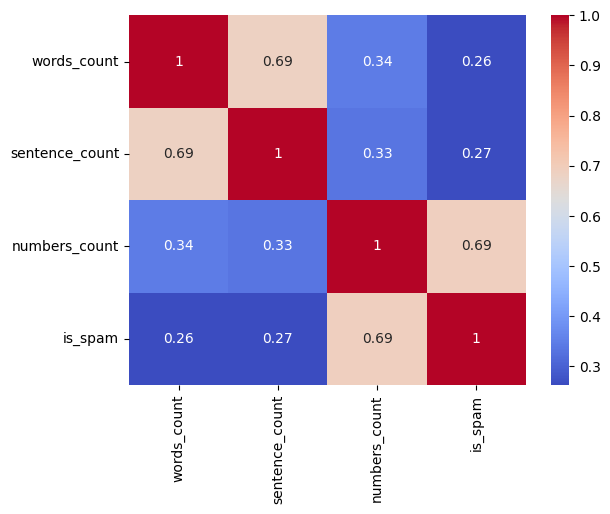

In [54]:
sns.heatmap(df[corr_columns].corr(), annot=True, cmap='coolwarm')

In [55]:
# As I thought, the numbers in sms has strong correlation with the sms being sms or not. 

# Data Preprocessing

In [56]:
def clean_sms(sms):
    # lowercase every word
    sms = sms.lower()
    # get stop words stop words
    stop_words = set(stopwords.words('english'))  # You need to define stopwords
    # get the punctuations
    punctuation_symbols = set(string.punctuation)
    punctuation_symbols = punctuation_symbols.union(['..', '...', '.'])
    # combine punctuations with stopwords
    stop_words_and_punctuation = stop_words.union(punctuation_symbols)
    # remove the stop words and punctuations from sms
    sms_tokens = nltk.word_tokenize(sms)
    sms = [word for word in sms_tokens if word not in stop_words_and_punctuation]
    sms = ' '.join(sms)
    return sms

In [57]:
df['clean_sms'] = df['sms'].apply(clean_sms)
df

,is_spam,sms,words_count,sentence_count,numbers_count,clean_sms
0,0,"Go until jurong point, crazy.. Available only ...",24,2,0,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,8,2,0,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,3,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,13,1,0,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,0,nah n't think goes usf lives around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,4,4,2nd time tried 2 contact u. u å£750 pound priz...
5568,0,Will Ì_ b going to esplanade fr home?,9,1,0,ì_ b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",15,2,0,pity mood suggestions
5570,0,The guy did some bitching but I acted like i'd...,27,1,0,guy bitching acted like 'd interested buying s...


#### Displaying the word cloud

In [58]:
from wordcloud import WordCloud
wc = WordCloud(width=750,height=600,min_font_size=14,background_color='white')

#### Spam words

In [59]:
spam_wc = wc.generate(df[df['is_spam']==1]['clean_sms'].str.cat(sep=" "))

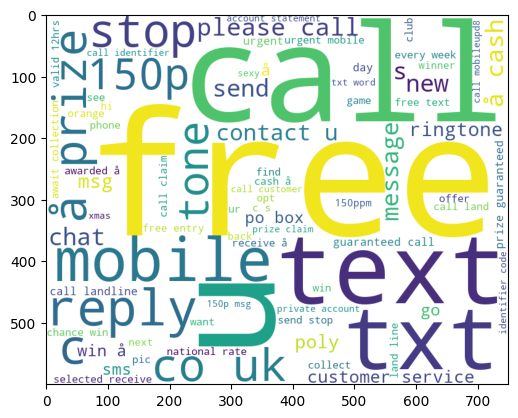

In [60]:
plt.imshow(spam_wc)

#### Ham words

In [61]:
ham_wc = wc.generate(df[df['is_spam']==0]['clean_sms'].str.cat(sep=" "))

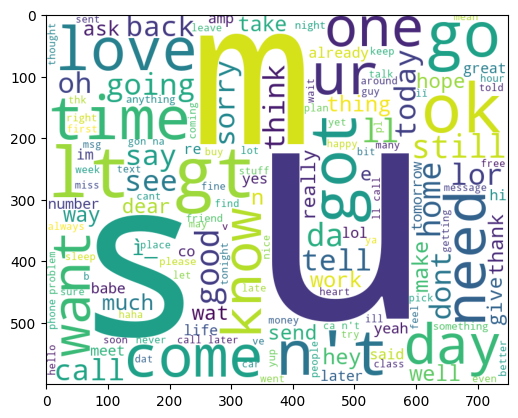

In [62]:
plt.imshow(ham_wc)

#### Cleaned Ham SMS

In [63]:
hams = df[df['is_spam']==0]['clean_sms'].tolist()
hams

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'u dun say early hor u c already say',
 "nah n't think goes usf lives around though",
 'even brother like speak treat like aids patent',
 "per request 'melle melle oru minnaminunginte nurungu vettam set callertune callers press 9 copy friends callertune",
 "'m gon na home soon n't want talk stuff anymore tonight k 've cried enough today",
 "'ve searching right words thank breather promise wont take help granted fulfil promise wonderful blessing times",
 'date sunday',
 "oh k 'm watching",
 'eh u remember 2 spell name yes v naughty make v wet',
 'fine thatåõs way u feel thatåõs way gota b',
 'seriously spell name',
 'i\x89û÷m going try 2 months ha ha joking',
 'ì_ pay first lar da stock comin',
 'aft finish lunch go str lor ard 3 smth lor u finish ur lunch already',
 'ffffffffff alright way meet sooner',
 "forced eat slice 'm really hungry tho sucks mark getting worried kn

#### Cleaned Spam SMS

In [64]:
spams = df[df['is_spam']==1]['clean_sms'].tolist()
spams

["free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question std txt rate c 's apply 08452810075over18 's",
 "freemsg hey darling 's 3 week 's word back 'd like fun still tb ok xxx std chgs send å£1.50 rcv",
 'winner valued network customer selected receivea å£900 prize reward claim call 09061701461. claim code kl341 valid 12 hours',
 'mobile 11 months u r entitled update latest colour mobiles camera free call mobile update co free 08002986030',
 'six chances win cash 100 20,000 pounds txt csh11 send 87575. cost 150p/day 6days 16+ tsandcs apply reply hl 4 info',
 'urgent 1 week free membership å£100,000 prize jackpot txt word claim 81010 c www.dbuk.net lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt message click http //wap xxxmobilemovieclub.com n=qjkgighjjgcbl',
 'england v macedonia dont miss goals/team news txt ur national team 87077 eg england 87077 try wales scotland 4txt/ì¼1.20 poboxox36504w45wq 16+',
 

# Split Train and test Data

In [65]:
X = df['clean_sms']
y = df['is_spam']

In [66]:
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [68]:
print(X_train.shape)
print(y_train.shape)

(3900,)
(3900,)


In [69]:
print(X_test.shape)
print(y_test.shape)

(1672,)
(1672,)


In [70]:
# TF-IDF Vectorizer

In [71]:
vectorizer = TfidfVectorizer()

In [72]:
X_train = vectorizer.fit_transform(X_train)

In [73]:
print(type(X_train))
print(X_train.shape)

<class 'scipy.sparse._csr.csr_matrix'>
(3900, 7136)


# Naive Bayes Classifier

In [74]:
model = MultinomialNB()

In [75]:
model.fit(X_train, y_train)

MultinomialNB()

# Test

In [76]:
X_test = vectorizer.transform(X_test)
print(X_test.shape)

(1672, 7136)


In [77]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [78]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy = {(accuracy*100):.2f}%")
print(classification_report(y_test, y_pred,  zero_division=1))

Accuracy = 97.13%
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1453
           1       1.00      0.78      0.88       219

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672



<b>Thus, the model can predict whethere the given sms is spam or not with the accuracy of <u>97.13%</u>. </b>

In [ ]:
import pickle
with open('spam_classifier.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('vectorizer.pkl','wb') as file:
    pickle.dump(vectorizer,file)